# TP3 Méthodes par recherche directe de politique

Dans ce TP, vous devez implémenter un agent qui fait de la recherche stochastique de politique pour apprendre à controler un système. L'environnement de simulation utilisé sera [CartPole](https://gymnasium.farama.org/environments/classic_control/cart_pole/).


<img src='img/cartpole.png'  width=500px>



In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import gymnasium as gym

env = gym.make("CartPole-v1", render_mode= "human")
print("dimension de l'espace des observation : ", env.observation_space.shape[0])
print(" taille de l'espace des actions : ", env.action_space.n)
print("valeur minimale : ", env.observation_space.low)
print("valeur maximale : ", env.observation_space.high)
print("action au hasard : ", env.action_space.sample())
print("observation prise au hasard : ", env.observation_space.sample())
env.close()

dimension de l'espace des observation :  4
 taille de l'espace des actions :  2
valeur minimale :  [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
valeur maximale :  [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
action au hasard :  0
observation prise au hasard :  [-3.0477653e+00 -1.4641161e+38 -2.1634305e-01  1.5969421e+38]


In [3]:
env = gym.make("CartPole-v1", render_mode= "human")
observation, info = env.reset()
terminated = False
truncated = False 
total_reward = 0
while not (terminated or truncated): 
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

env.close()
if truncated : 
    print("L'épisode c'est fini prématurément soit car l'agent a pris trop de temps soit qu'il est sortis de l'espace d'observation")
else :
    print("l'épisode c'est fini car l'agent a atteint le sol")

print("récompense total : ", total_reward)

/Users/timothebonhoure/miniconda3/envs/tpdeeprl2023/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


l'épisode c'est fini car l'agent a atteint le sol
récompense total :  37.0




# Consignes

> Pour chaque algorithme, vous devez tracer la somme des récompenses obtenues par épisode pour:
- la phase d'apprentissage
- une phase de test de la meilleure politique

> Vous devez sauvegardez la meilleure politique trouvée pour chaque algorithme. 

> Vous proposerez une méthode permettant de charger une politique sauvegardée et de la tester (tracé des récompenses sur x épisodes de test).


In [4]:
%autoreload 2
from agents import BaseAgent


agent = BaseAgent("CartPole-v1", render_mode= "human")
agent.runOneEpisode()
env.close()



# 1. Principe

<img src='img/principe.png'  width=700px>

# 2. Algo 1: Hill CLimbing

Implémenter l'algorihme de Hill Climbing ci-dessous:

<img src='img/hillclimbing.png'  width=500px>

avec $G$ la somme (pondérée) des récompenses sur un épisode.


90  :  500.0
[[ 0.82151176 -6.96508944 -5.7298319  -5.38215913]
 [-0.31641558  0.15169393  5.31146798  7.53832783]]
500.0


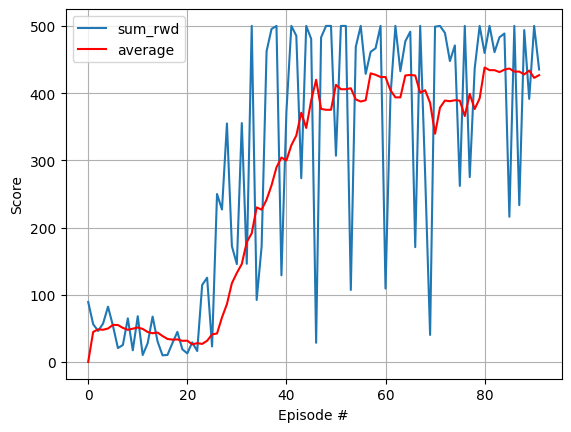

In [30]:
%autoreload 2
from agents import HillClimbingAgent


agent = HillClimbingAgent("CartPole-v1")
agent.climb(n_ep= 10)

print(agent.test_agent(100))
agent.change_render_mode("human")
agent.test_agent(1)

agent.saveStrategy("HillClimbingAgent.txt")

env.close()



# 3. Algo 2: Hill Climbing avec Adaptive Noise Scaling

Améliorer l'algorithme précédent en ajoutant une modification de la variance du bruit.



episodes :  350
reward :  500.0
noise :  845.0593918262517
[[-2.52794786 -1.54716389 -8.32762353 -4.63126129]
 [-2.53344251  0.63309572 -0.51490224  4.05228239]]
500.0


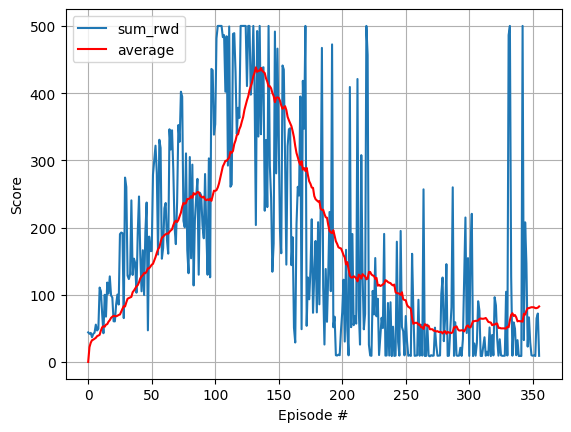

In [34]:
%autoreload 2
from agents import AdaptHillClimbingAgent


agent = AdaptHillClimbingAgent("CartPole-v1")
agent.climb(n_ep = 10)

print(agent.test_agent(100))
agent.change_render_mode("human")
agent.test_agent(1)
agent.saveStrategy("AdaptHillClimbingAgent.txt")

env.close()

In [12]:
agent = BaseAgent()
agent.loadStrategy("AdaptHillClimbingAgent.txt")
print(agent.test_agent(n_ep= 100))
agent.loadStrategy("HillClimbingAgent.txt")
print(agent.test_agent(n_ep=100))

500.0
498.27
